In [ ]:
a='rajesh@gmail.com'
a.find('@')

In [ ]:

# Importing libraries 
import bs4 as bs 
import sys 
import urllib.request 
from PyQt5.QtWebEngineWidgets import QWebEnginePage 
from PyQt5.QtWidgets import QApplication 
from PyQt5.QtCore import QUrl 
import pytube # library for downloading youtube videos 
  
  
class Page(QWebEnginePage): 
    def __init__(self, url): 
        self.app = QApplication(sys.argv) 
        QWebEnginePage.__init__(self) 
        self.html = '' 
        self.loadFinished.connect(self._on_load_finished) 
        self.load(QUrl(url)) 
        self.app.exec_() 
  
    def _on_load_finished(self): 
        self.html = self.toHtml(self.Callable) 
        print('Load finished') 
  
    def Callable(self, html_str): 
        self.html = html_str 
        self.app.quit() 
  
  
links = [] 
  
  
def exact_link(link): 
    vid_id = link.split('=')
    print("Running")
    # print(vid_id) 
    str = "" 
    for i in vid_id[0:2]: 
        str += i + "="
  
    str_new = str[0:len(str) - 1] 
    index = str_new.find("&") 
  
    new_link = "https://www.youtube.com" + str_new[0:index] 
    return new_link 
  
  
url = "https://www.youtube.com/watch?v=lcJzw0JGfeE&list=PLqM7alHXFySENpNgw27MzGxLzNJuC_Kdj"
# Scraping and extracting the video 
# links from the given playlist url 
page = Page(url) 
count = 0
  
soup = bs.BeautifulSoup(page.html, 'html.parser') 
for link in soup.find_all('a', id='thumbnail'): 
#     print(link)
      
    # not using first link because it is 
    # playlist link not particular video link 
    if count == 0:  
        count += 1
        continue
    else: 
        vid_src = link['href'] 
        # print(vid_src) 
        # keeping the format of link to be 
        # given to pytube otherwise in some cases 
        new_link = exact_link(vid_src)  
          
        # error might occur due to this 
        # print(new_link) 
          
        # appending the link to the links array 
        links.append(new_link)  
  
# print(links) 
  
# downloading each video from 
# the link in the links array 
for link in links:  
    yt = pytube.YouTube(link) 
      
    # Downloaded video will be the best quality video 
    stream = yt.streams.filter(progressive=True, 
                file_extension='mp4').order_by( 
                'resolution').desc().first()  
    try: 
        stream.download() 
        # printing the links downloaded 
        print("Downloaded: ", link)  
    except: 
        print('Some error in downloading: ', link) 

In [ ]:
#!/usr/bin/env python
import os, sys, time
import argparse
# from urllib3 import urlopen
from urllib.request import urlopen

import pytube  # pip install pytube


CS294_playlist_url = "https://www.youtube.com/playlist?list=PLkFD6_40KJIwTmSbCv9OVJB3YaO4sFwkX"


def get_playlist_links(playlist_url):
    page_elements = urlopen(playlist_url).readlines()
    video_elements = [el for el in page_elements if 'pl-video-title-link' in el]  # Filter out unnecessary lines
    video_urls = [v.split('href="',1)[1].split('" ',1)[0] for v in video_elements]  # Grab the video urls from the elements
    return ['http://www.youtube.com' + v for v in video_urls]


start_time = time.time()

def print_dot(bytes_received, file_size, start):
    global start_time
    if time.time() - start_time > 1.0:
        sys.stdout.write('.')
        sys.stdout.flush()
        start_time = time.time()


parser = argparse.ArgumentParser(usage='%(prog)s [-h] [-p PLAYLISTURL] [-d DESTINATION]')
parser.add_argument('-p', '--playlisturl', help='url of the playlist to be downloaded', default=CS294_playlist_url, metavar='')
parser.add_argument('-d', '--destination', help='path of directory to save videos to', default=os.path.curdir, metavar='')
args = parser.parse_args()


if os.path.exists(args.destination):
    directory_contents = [f.split('.mp4',1)[0] for f in os.listdir(args.destination) if f.endswith('.mp4')]
else:
    print('Destination directory does not exist')
    sys.exit(1)

video_urls = get_playlist_links(args.playlisturl)
confirmation = raw_input('You are about to download {} videos to {}\nWould you like to continue? [Y/n] '.format(
    len(video_urls), os.path.abspath(args.destination)))

if confirmation.lower() in ['y', '']:
    for u in video_urls:
        yt = pytube.YouTube(u)
        vid = yt.streams.filter(file_extension='mp4').order_by('res').last() # grab the highest resolution mp4 file

        if vid.default_filename in directory_contents:
            print('Skipping {}'.format(vid.default_filename))
            continue
        else:
            print('Downloading {}'.format(vid.default_filename))
            vid.download(args.destination)
            print('Done')

In [ ]:
# Importing libraries
import bs4 as bs
import sys
import urllib.request
from PyQt5.QtWebEngineWidgets import QWebEnginePage
from PyQt5.QtWidgets import QApplication
from PyQt5.QtCore import QUrl
import pytube # library for downloading youtube videos


class Page(QWebEnginePage):
    def __init__(self, url):
        self.app = QApplication(sys.argv)
        QWebEnginePage.__init__(self)
        self.html = ''
        self.loadFinished.connect(self._on_load_finished)
        self.load(QUrl(url))
        self.app.exec_()

    def _on_load_finished(self):
        self.html = self.toHtml(self.Callable)
        print('Load finished')

    def Callable(self, html_str):
        self.html = html_str

        self.app.quit()


links = []


def exact_link(link):
    print(link)
    vid_id = link.split('=')
    print(vid_id)
    # print(vid_id)
    str = ""
    for i in vid_id[0:2]:
        str += i + "="

    str_new = str[0:len(str) - 1]
    index = str_new.find("&")

    new_link = "https://www.youtube.com" + str_new[0:index]
    return new_link


# url = "https://www.youtube.com/watch?v=lcJzw0JGfeE&list=PLqM7alHXFySENpNgw27MzGxLzNJuC_Kdj"

url= r'https://www.youtube.com/playlist?list=PLVuQBUGB87-gomoG36CV4wMZCkGPGKw3p'
# Scraping and extracting the video
# links from the given playlist url
page = Page(url)
count = 0

soup = bs.BeautifulSoup(page.html, 'html.parser')
for link in soup.find_all('a', id='thumbnail'):

# not using first link because it is
# playlist link not particular video link
    if count == 0:
        count += 1
        continue
    else:
        try:
            vid_src = link['href']
        except:
            print("could not find href for the video:: {0}".format(link))
            continue
#             pass
        print("****##vid_src###****")
        print(type(vid_src))
#         print(vid_src)
#         if vid_src is None or vid_src == '':
#             print(vid_src)
# print(vid_src)
# keeping the format of link to be
# given to pytube otherwise in some cases
        new_link = exact_link(vid_src)

# error might occur due to this
# print(new_link)

# appending the link to the links array
        links.append(new_link)

# print(links)

# downloading each video from
# the link in the links array
for link in links:
    try:
        yt = pytube.YouTube(link)
    except:
        continue

    # Downloaded video will be the best quality video
    stream = yt.streams.filter(progressive=True,
        file_extension='mp4').order_by(
        'resolution').desc().first()
    try:
        stream.download()
        # printing the links downloaded
        print("Downloaded: ", link)
    except:
        print('Some error in downloading: ', link) 


In [1]:
import pandas as pd
import numpy as np

In [2]:
val=lambda x: 'incative' in x.lower()

val("inactive")

False

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
tips=sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


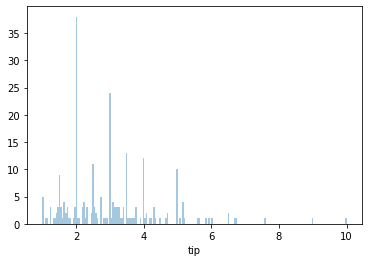

In [7]:
sns.distplot(tips['tip'],kde=False,bins=200)


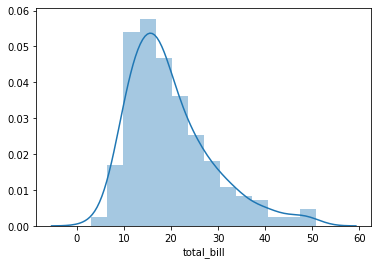

In [8]:
sns.distplot(tips['total_bill'])

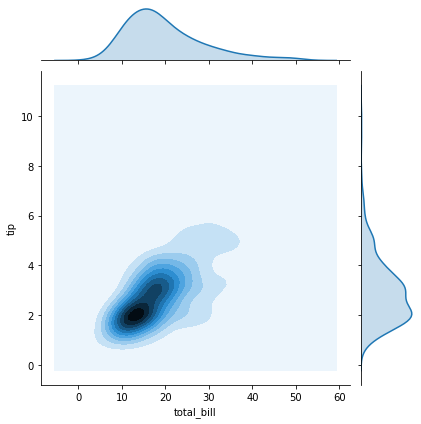

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')##kind='reg' #kind='hex'

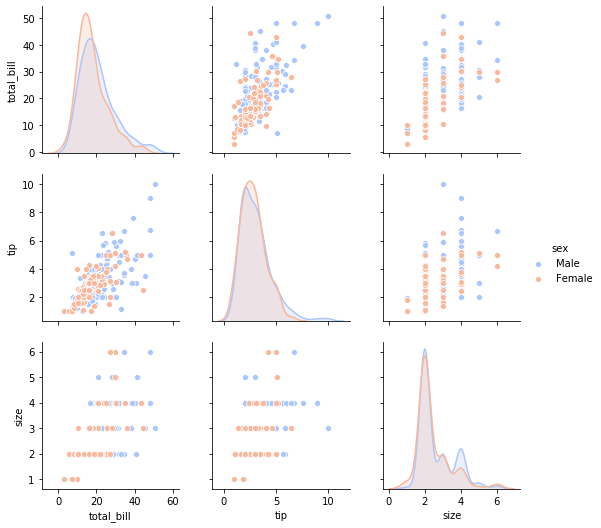

In [10]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

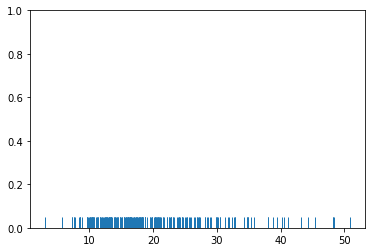

In [11]:
sns.rugplot(tips['total_bill'])

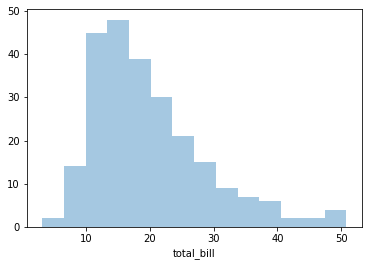

In [12]:
sns.distplot(tips['total_bill'],kde=False)

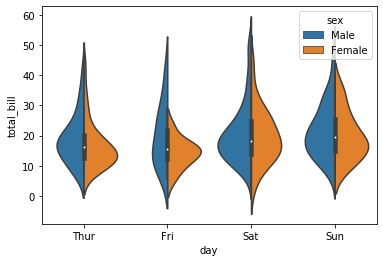

In [13]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

In [14]:
from plotly import __version__
import cufflinks as cf
plotly.offline.init_notebook_mode(connected=True)

In [15]:
print(__version__)

NameError: name '__version__' is not defined

In [16]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# init_notebook_mode(connected=True)

# cf.go_offline()

In [17]:
import pandas as pd
import numpy as np

df=pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})


df.iplot(kind='surface',colorscale='rdylbu')

PlotlyRequestError: Authentication credentials were not provided.

In [3]:
from multiprocessing import Value
counter = Value('i', 0)

def id_generator():
    with counter.get_lock():
        counter.value += 1
        return counter.value

In [9]:
id_generator()

6

In [3]:
da='rajesh_ui_ygbu'
das=da.replace('-','*')
das

'rajesh_ui_ygbu'